# K-Nearest Clustering -Scratch

Soyut Algoritma; 
1. Ağırlık merkezlerini başlatmak - Rastgele K nokta sayısı ile başlanır.
2. Kümeleri Atamak - Kümeler, merkezden uzaklıkları hesaplanarak, minimum mesafeler üzerinden ağırlık merkezine atanarak veri kümesindeki her noktaya atanır.
3. Ağırlık merkezlerini yeni etiketli veriler üzerinden tekrar hesaplamak - Güncellenmiş her kümenin ağırlık merkezinin tekrar hesaplanması ile ağırlık merkezi güncellenir.
![title](step1.png)
![title](step2.png)
![title](step3.png)
![title](step4.png)
![title](step5.png)
Kullanılacak olan öklid mesafe formülü.
![title](euclideanformula.png)
Algoritmadaki maliyet fonksiyonu.
Maliyet fonksiyonu, noktalardan kendi küme merkezlerine Öklid mesafelerinin toplamıdır.
![title](cost.png)
Optimum değere ulaşmak için J'yi küçültmek gerekiyor. Yani J'yi 2 değişkene göre art arda diferansiye edeceğiz. İlk adımda, xi veri noktası öklid mesafesine göre en yakın olan kendi centroid ci'sine atanır.
![title](first.png)
İkinci adımda, veri noktaları atandıktan sonra kümenin merkezini yeniden hesaplanması gerçekleştirilir.
![title](second.png)
...Yukarıdaki iki adım, veri noktalarının optimal separasyon elde edene kadar yinelemeli olarak gerçekleştirilecektir.
Tolerans değeri hesaplamasında, eşik olarak frobenius L2 Norm'u kullanılmıştır
![title](VsGnJ.png)
Başlangıç küme merkezlerinin atanması için 2 farklı yöntem kullanılmıştır: Random ve K-means++

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=5, random_state=101)

In [3]:
X[:10] # 2 boyutlu inputlar

array([[ 2.8937669 , -8.85149587],
       [-5.58835937,  6.4315154 ],
       [ 3.33793405,  6.88729252],
       [ 4.61089051, -6.97392816],
       [-7.69246622, -6.05649548],
       [ 0.23867411,  2.11191814],
       [ 3.72765275,  7.03260309],
       [ 3.86345797,  9.2556547 ],
       [ 0.76827885,  1.99421592],
       [-9.53326097, -7.4197209 ]])

In [4]:
y[:10] # target, clustering algoritmada kullanılmayacaktır

array([4, 3, 2, 4, 1, 0, 2, 2, 0, 1])

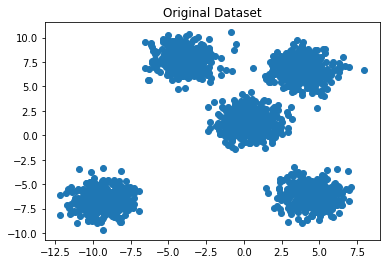

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')
plt.show()

In [6]:
m=X.shape[0]
n=X.shape[1]
counter=0
n_iter=20
tolerance=0.001
flag=False
K=5

In [7]:
### RANDOM INIT ###
'''
centroids=np.array([]).reshape(n,0) 
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]
'''

'\ncentroids=np.array([]).reshape(n,0) \nfor k in range(K):\n    centroids=np.c_[centroids,X[random.randint(0,m-1)]]\n'

In [8]:
### K-MEANS++ INIT ###
centroids = [X[random.randint(0,m-1)]]
for _ in range(1, K):    
        dist = np.array([min([np.sqrt(np.sum((c-x)**2)) for c in centroids]) for x in X])
        probs = dist/dist.sum()
        centroids.append(X[np.argmax(probs)])
centroids = np.array(centroids).T

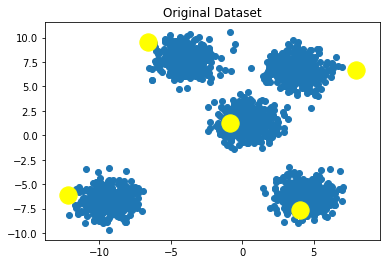

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.show()

In [10]:
while (counter < n_iter):
    previous_centroids = list(centroids)
    previous_centroids = np.array(previous_centroids)
    counter += 1
    euclid_dists=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid_dists=np.c_[euclid_dists,dist]
    cmin=np.argmin(euclid_dists,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(n,0)
    for k in range(m):
        cent[cmin[k]]=np.c_[cent[cmin[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    print(counter,". iterasyon",)
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0) 
        diff = np.absolute(centroids[:,k] - previous_centroids[:,k])
        frobenius = np.linalg.norm(diff)
        print(k+1,".centroid frobenius degeri",frobenius)
        if frobenius < tolerance:
            flag = True
    print("***")
            
    final_cent=cent
    if flag==True:
        break

1 . iterasyon
1 .centroid frobenius degeri 1.5447478717463758
2 .centroid frobenius degeri 3.112145501342493
3 .centroid frobenius degeri 2.864264344140834
4 .centroid frobenius degeri 4.062591216909729
5 .centroid frobenius degeri 1.2887736061105008
***
2 . iterasyon
1 .centroid frobenius degeri 0.0
2 .centroid frobenius degeri 0.06997647244409701
3 .centroid frobenius degeri 0.0
4 .centroid frobenius degeri 0.08895247232406056
5 .centroid frobenius degeri 0.27589886187713925
***


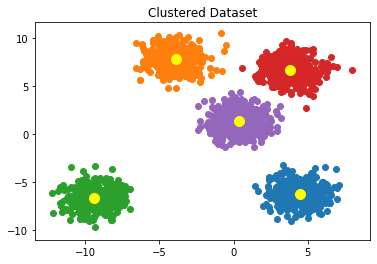

In [11]:
for k in range(K):
    plt.scatter(final_cent[k+1][:,0],final_cent[k+1][:,1])

plt.scatter(centroids[0,:],centroids[1,:],s=100,c='yellow')
plt.title('Clustered Dataset')
plt.show()